In [20]:
from sklearn.datasets import load_boston
df=load_boston()
print(df)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [21]:
x=df.data
y=df.target
print(x.shape)
print(y.shape)
y=list(y)

(506, 13)
(506,)


In [22]:
import pandas as pd
frame=pd.DataFrame(x,columns=df.feature_names)
frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
import numpy as np
for i in df.feature_names:
    mean=frame[i].mean()
    std=frame[i].std()
    frame[i]=(frame[i]-mean)/std
templ=[]
for i in range(506):
    templ.append(1)
frame.insert(0,"X0",templ,True)
frame.head()

,X0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,1,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,1,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,1,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


In [24]:
newx=frame.values
newx.shape

(506, 14)

In [25]:

def hypothesis(x,theta):
    return np.dot(x,theta)
def error(x,y,theta):
    m=x.shape[0]
    ycap=hypothesis(x,theta)
    e=np.sum((y-ycap)**2)
    return e/m
def calculategradient(x,y,theta):
    ycap=hypothesis(x,theta)
    grad=np.dot(x.T,(ycap-y))
    m=x.shape[0]
    return grad/m
def gradientDescent(x,y,max_steps=100,learning_rate=0.1):
    n=x.shape[1]
    theta=np.zeros((n,))
    error_list=[]
    for i in range(max_steps):
        e=error(x,y,theta)
        error_list.append(e)
        grad=calculategradient(x,y,theta)
        theta-=learning_rate*grad
    return theta,error_list



In [26]:
theta,error_list=gradientDescent(newx,y)
print(theta,error_list)

[22.53220782 -0.78231698  0.81408013 -0.27370652  0.74318937 -1.58206404
  2.89030245 -0.10353859 -2.74959397  1.46265246 -0.88375289 -1.95479885
  0.87286599 -3.64793912] [592.1469169960474, 462.5018877119178, 375.4123600947748, 307.7164284056754, 253.4139174999981, 209.58122556875412, 174.15019167299096, 145.49656865002623, 122.31664072396205, 103.5593458693272, 88.37641012120092, 76.08293402872107, 66.1257686640774, 58.058060131223634, 51.518740234023625, 46.21599425796338, 41.91392960611799, 38.421821926563204, 35.58543768424597, 33.280030200389845, 31.404684889103986, 29.877752631136538, 28.633161020666638, 27.61743406375362, 26.787283764030196, 26.107663476753896, 25.550194207176837, 25.09189218381118, 24.714139861982122, 24.40185365851156, 24.14281070683562, 23.927104173094364, 23.746702525249827, 23.595092870592737, 23.46699229060978, 23.358114182051168, 23.26497910090124, 23.18476161603157, 23.11516630368589, 23.05432732686479, 23.000727105046643, 22.953130437835046, 22.910531

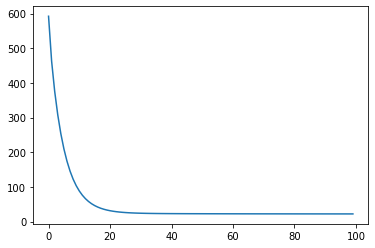

In [27]:
import matplotlib.pyplot as plt
plt.plot(error_list)

In [31]:
ycap=hypothesis(newx,theta)

y=np.array(y)
def r2score(y,ycap):
    num=np.sum((y-ycap)**2)
    denom=np.sum((y-y.mean())**2)
    score=1-(num/denom)
    return score*100

r2score(y,ycap)

73.74678747741142